## EXAMEN TRANSVERSAL DE DATA MINING

Profesor: Christian Alvarez Carreño

Integrantes:
  
  -Roberto Pérez

  -Mateo Araneda


Grupo: GINI

Sección: BIY7121

### PRIMERAS IMPORTACIONES Y DESCARGA DEL SET DE DATOS

In [22]:
import pandas as pd
import numpy as np
import requests as rq #Importamos 'request' para hacer una petición HTTP

# importamos el data set desde GitHub / Como es un archivo que necesitamos leer directamente desde Github, tenemos que cambiar 'blob' por 'raw'
url_dataset = 'https://github.com/Rektres/DM_Obesity/raw/main/ObesityDataSet.csv'

# A traves de request, llamamos el dataset
response = rq.get(url_dataset)

#Abre un archivo en modo escritura binaria ('wb') y escribe el contenido descargado
open('SetObesity.csv', 'wb').write(response.content) #Si el archivo no existe lo crea, si existe, lo sobrescribe

df_SetObesity = pd.read_csv('SetObesity.csv')

### VISUALIZACIÓN DEL DATA SET

In [23]:
df_SetObesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [24]:
# Definimos los tipos de nulos que utiliza numpy
na_values = ('np.nan', 'NA', 'NaN', 'nan', 'inf')
df_SetObesity = pd.read_csv('SetObesity.csv', na_values=na_values) # AGREGUÉ ESTA LÍNEA PARA USAR "na_values"

# Número total de filas en el DataFrame
total_filas = len(df_SetObesity)

# Iteramos sobre cada columna
for columna in df_SetObesity.columns:
    # Contamos la cantidad de nulos en cada columna
    conteo_nulos = df_SetObesity[columna].isnull().sum()

    # Si la cantidad de nulos es mayor a 0, mostramos la cantidad de nulos por columna y su respectivo porcentaje
    if conteo_nulos > 0:
        porcentaje_nulos = (conteo_nulos/total_filas)*100
        print(f"La columna '{columna}' tiene {conteo_nulos} valores nulos ({porcentaje_nulos:.2f}%)")
    elif (conteo_nulos == 0):
        print(f"La columna '{columna}' no tiene valores nulos")

La columna 'Gender' no tiene valores nulos
La columna 'Age' no tiene valores nulos
La columna 'Height' no tiene valores nulos
La columna 'Weight' no tiene valores nulos
La columna 'family_history_with_overweight' no tiene valores nulos
La columna 'FAVC' no tiene valores nulos
La columna 'FCVC' no tiene valores nulos
La columna 'NCP' no tiene valores nulos
La columna 'CAEC' no tiene valores nulos
La columna 'SMOKE' no tiene valores nulos
La columna 'CH2O' no tiene valores nulos
La columna 'SCC' no tiene valores nulos
La columna 'FAF' no tiene valores nulos
La columna 'TUE' no tiene valores nulos
La columna 'CALC' no tiene valores nulos
La columna 'MTRANS' no tiene valores nulos
La columna 'NObeyesdad' no tiene valores nulos


### DICCIONARIO DE VARIABLES

In [25]:

    # | Variable Name                  | Role    | Type        | Demographic | Description                                                                             | Units | Missing Values |
    # |--------------------------------|---------|-------------|-------------|-----------------------------------------------------------------------------------------|--------|----------------|
    # | Gender                         | Feature | Categorical | Gender      | -                                                                                       | -      | no             |
    # | Age                            | Feature | Continuous  | Age         | -                                                                                       | -      | no             |
    # | Height                         | Feature | Continuous  |             | -                                                                                       | -      | no             |
    # | Weight                         | Feature | Continuous  |             | -                                                                                       | -      | no             |
    # | family_history_with_overweight | Feature | Binary      |             | ¿Algún familiar ha sufrido o sufre de sobrepeso?                                        | -      | no             |
    # | FAVC                           | Feature | Binary      |             | ¿Consumes alimentos altos en calorías con frecuencia?                                   | -      | no             |
    # | FCVC                           | Feature | Integer     |             | ¿Sueles comer verduras en tus comidas?                                                  | -      | no             |
    # | NCP                            | Feature | Continuous  |             | ¿Cuántas comidas principales haces al día?                                              | -      | no             |
    # | CAEC                           | Feature | Categorical |             | ¿Consumes alimentos entre comidas?                                                      | -      | no             |
    # | SMOKE                          | Feature | Binary      |             | ¿Fumas?                                                                                 | -      | no             |
    # | CH2O                           | Feature | Continuous  |             | ¿Cuánta agua bebes diariamente?                                                         | -      | no             |
    # | SCC                            | Feature | Binary      |             | ¿Monitoreas las calorías que consumes diariamente?                                      | -      | no             |
    # | FAF                            | Feature | Continuous  |             | ¿Con qué frecuencia haces actividad física?                                             | -      | no             |
    # | TUE                            | Feature | Integer     |             | ¿Cuánto tiempo usas dispositivos tecnológicos como celular, videojuegos, TV, etc.?      | -      | no             |
    # | CALC                           | Feature | Categorical |             | ¿Con qué frecuencia consumes alcohol?                                                   | -      | no             |
    # | MTRANS                         | Feature | Categorical |             | ¿Qué medio de transporte usas habitualmente?                                            | -      | no             |
    # | NObeyesdad                     | Target  | Categorical |             | Nivel de obesidad                                                                       | -      | no             |


In [26]:
# Creamos una copia del dataset para tener un backup del original
df_SetObesity_Tratada = df_SetObesity.copy()

### ANALISIS EXPLORATORIO

/tmp/ipython-input-27-3130592225.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.countplot(data=df_SetObesity_Tratada, x=columna, palette="pastel")
/tmp/ipython-input-27-3130592225.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.countplot(data=df_SetObesity_Tratada, x=columna, palette="pastel")
/tmp/ipython-input-27-3130592225.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sbn.countplot(data=df_SetObesity_Tratada, x=columna, palette="pastel")
/tmp/ipython-input-27-3130592225.py:20: FutureWarning: 

Passing `palette` without assigning `hue

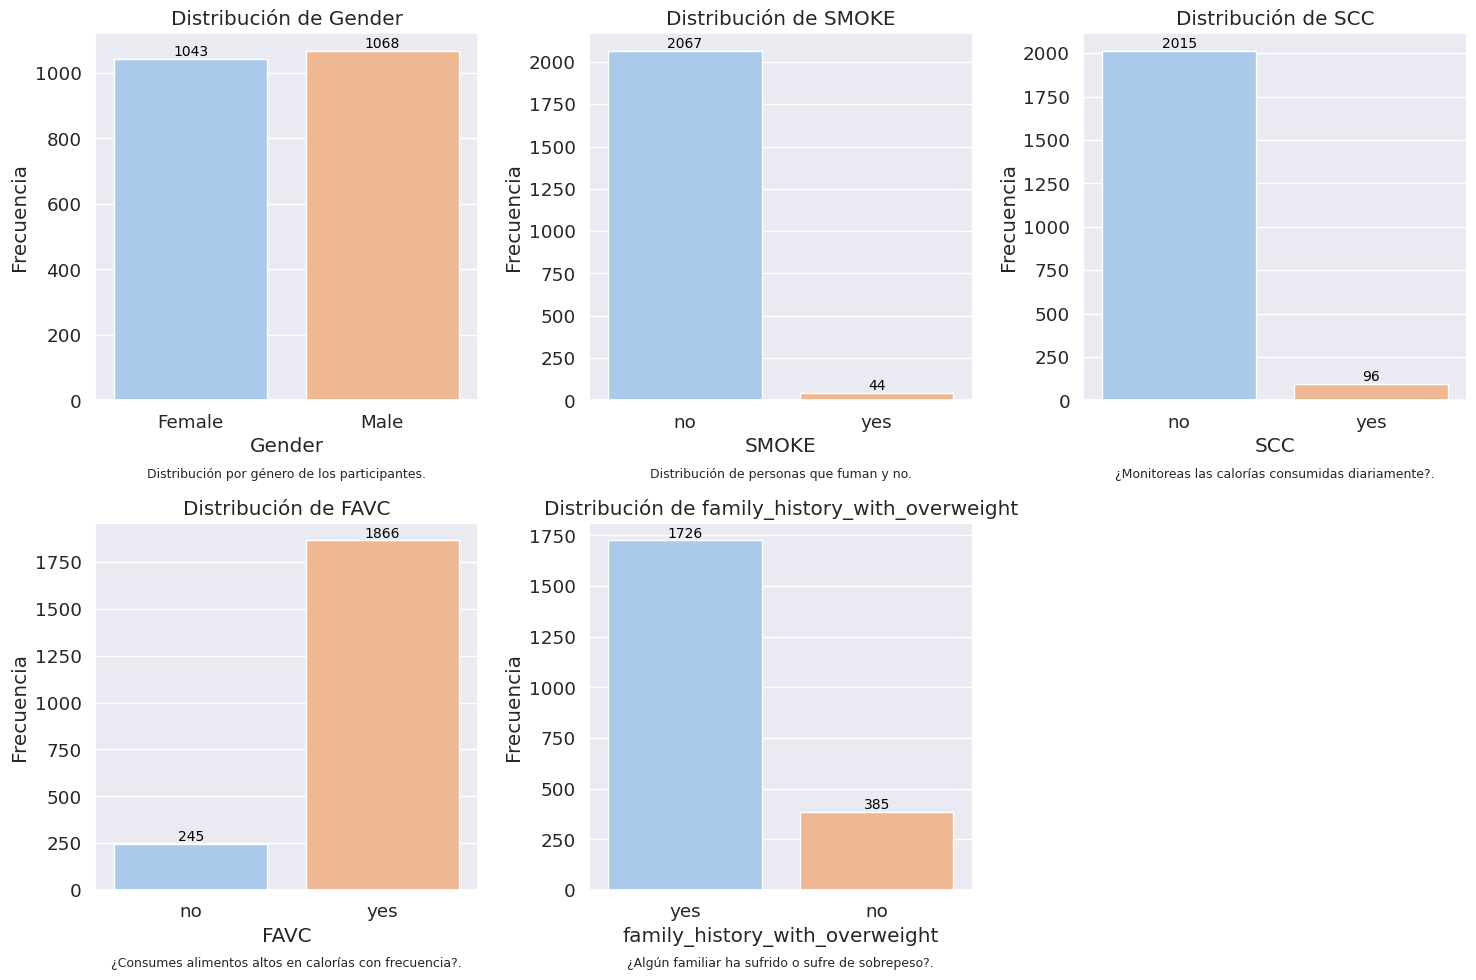

In [27]:
import matplotlib.pyplot as plt
import seaborn as sbn

# Lista de columnas y sus descripciones
all_columnas = ['Gender', 'SMOKE','SCC','FAVC','family_history_with_overweight']
descripciones = {
    'Gender': 'Distribución por género de los participantes.',
    'SMOKE': 'Distribución de personas que fuman y no.',
    'SCC': '¿Monitoreas las calorías consumidas diariamente?.',
    'FAVC': '¿Consumes alimentos altos en calorías con frecuencia?.',
    'family_history_with_overweight': '¿Algún familiar ha sufrido o sufre de sobrepeso?.'
}

# Tamaño del gráfico general
plt.figure(figsize=(15, 10))

# Iteración sobre las columnas
for i, columna in enumerate(all_columnas, 1):
    plt.subplot(2, 3, i)
    ax = sbn.countplot(data=df_SetObesity_Tratada, x=columna, palette="pastel")

    # Etiquetas con conteo
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Título y ejes
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Descripción dentro del gráfico
    plt.text(0.5, -0.2, descripciones[columna],
             fontsize=9, ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

Columna 'Age': 168 outliers (7.96%)
Columna 'Height': 1 outliers (0.05%)
Columna 'Weight': 1 outliers (0.05%)
Columna 'FCVC': 0 outliers (0.00%)
Columna 'NCP': 579 outliers (27.43%)
Columna 'CH2O': 0 outliers (0.00%)
Columna 'FAF': 0 outliers (0.00%)
Columna 'TUE': 0 outliers (0.00%)


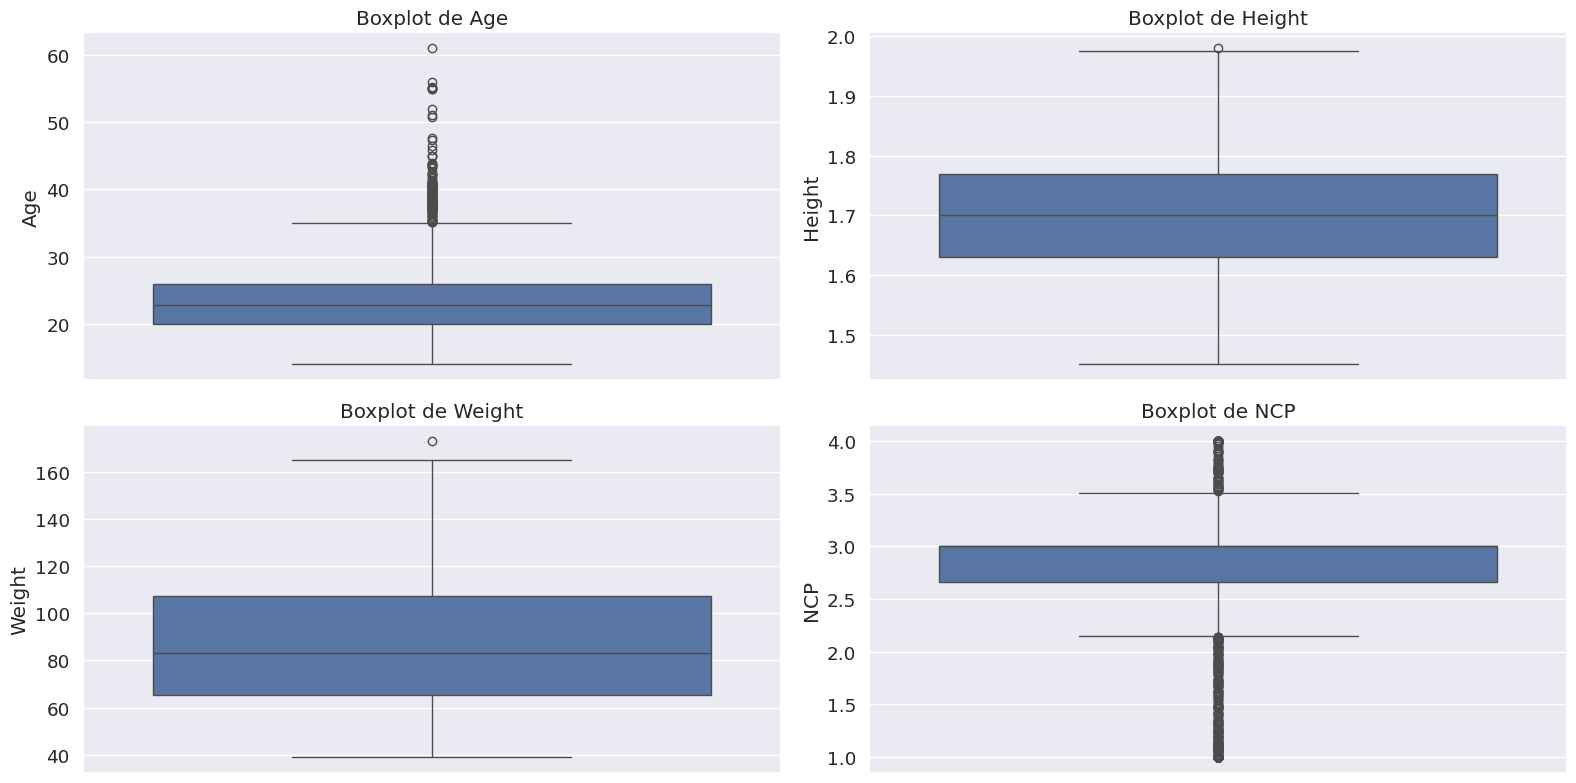

In [28]:
# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data.dropna(), 25)
    Q3 = np.percentile(data.dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Columnas numéricas del DataFrame
numeric_cols = df_SetObesity_Tratada.select_dtypes(include=np.number).columns

# Iterar sobre las columnas numéricas y detectar outliers
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_SetObesity_Tratada[col])
    num_outliers = len(outliers)
    porcentaje = (num_outliers / len(df_SetObesity_Tratada[col])) * 100 # AGREGUÉ PORCENTAJES PARA MAYOR COMPRENSIÓN DE LOS DATOS
    print(f"Columna '{col}': {num_outliers} outliers ({porcentaje:.2f}%)")

# Lista de columnas numéricas que quieres revisar
columnas_numericas = ['Age', 'Height', 'Weight', 'NCP']

# Tamaño del gráfico general
plt.figure(figsize=(16, 12))

# Iterar sobre las columnas y hacer un boxplot por cada una
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(3, 2, i)  # Cambia según cantidad de variables
    sbn.boxplot(data=df_SetObesity_Tratada, y=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

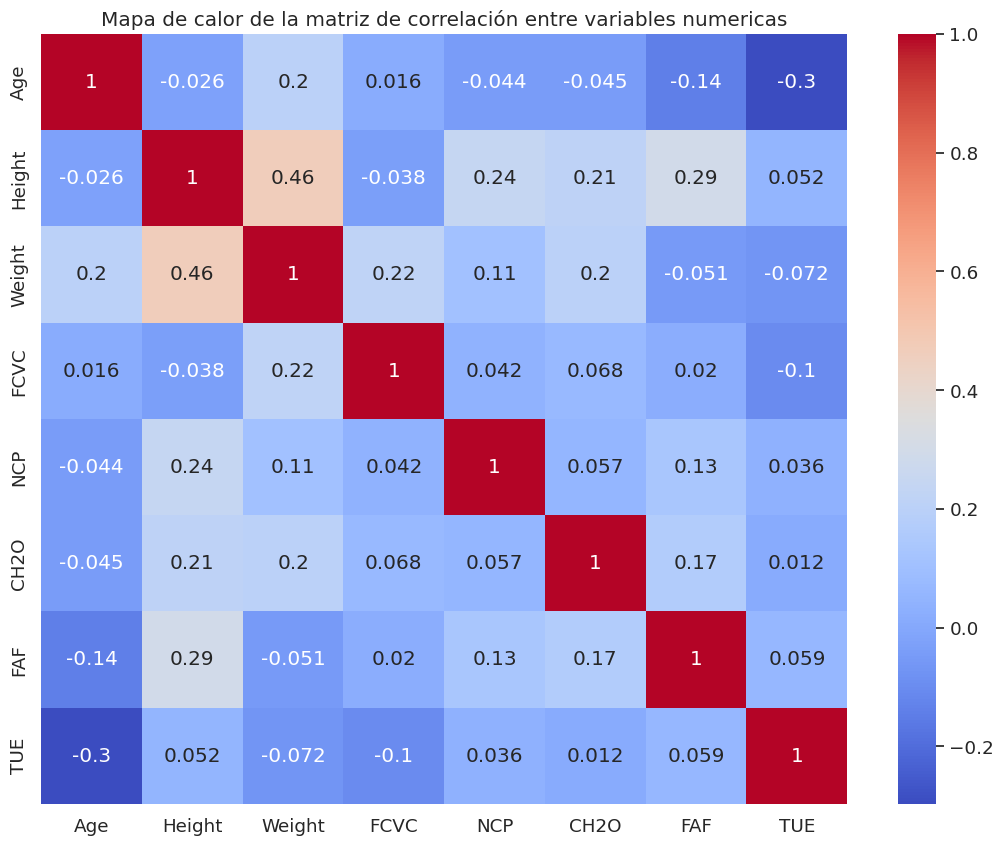

In [29]:
Columnas_numericas = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

# calcula la matriz de correlación entre estas columnas
corr_matrix = df_SetObesity_Tratada[Columnas_numericas].corr()

# Ajusta el tamaño y la escala de la fuente
plt.figure(figsize=(13, 10))  # ancho y la altura
sbn.set(font_scale=1.2)  # escala de fuente

# traza un mapa de calor de la matriz de correlación
sbn.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Mapa de calor de la matriz de correlación entre variables numericas')
plt.show()

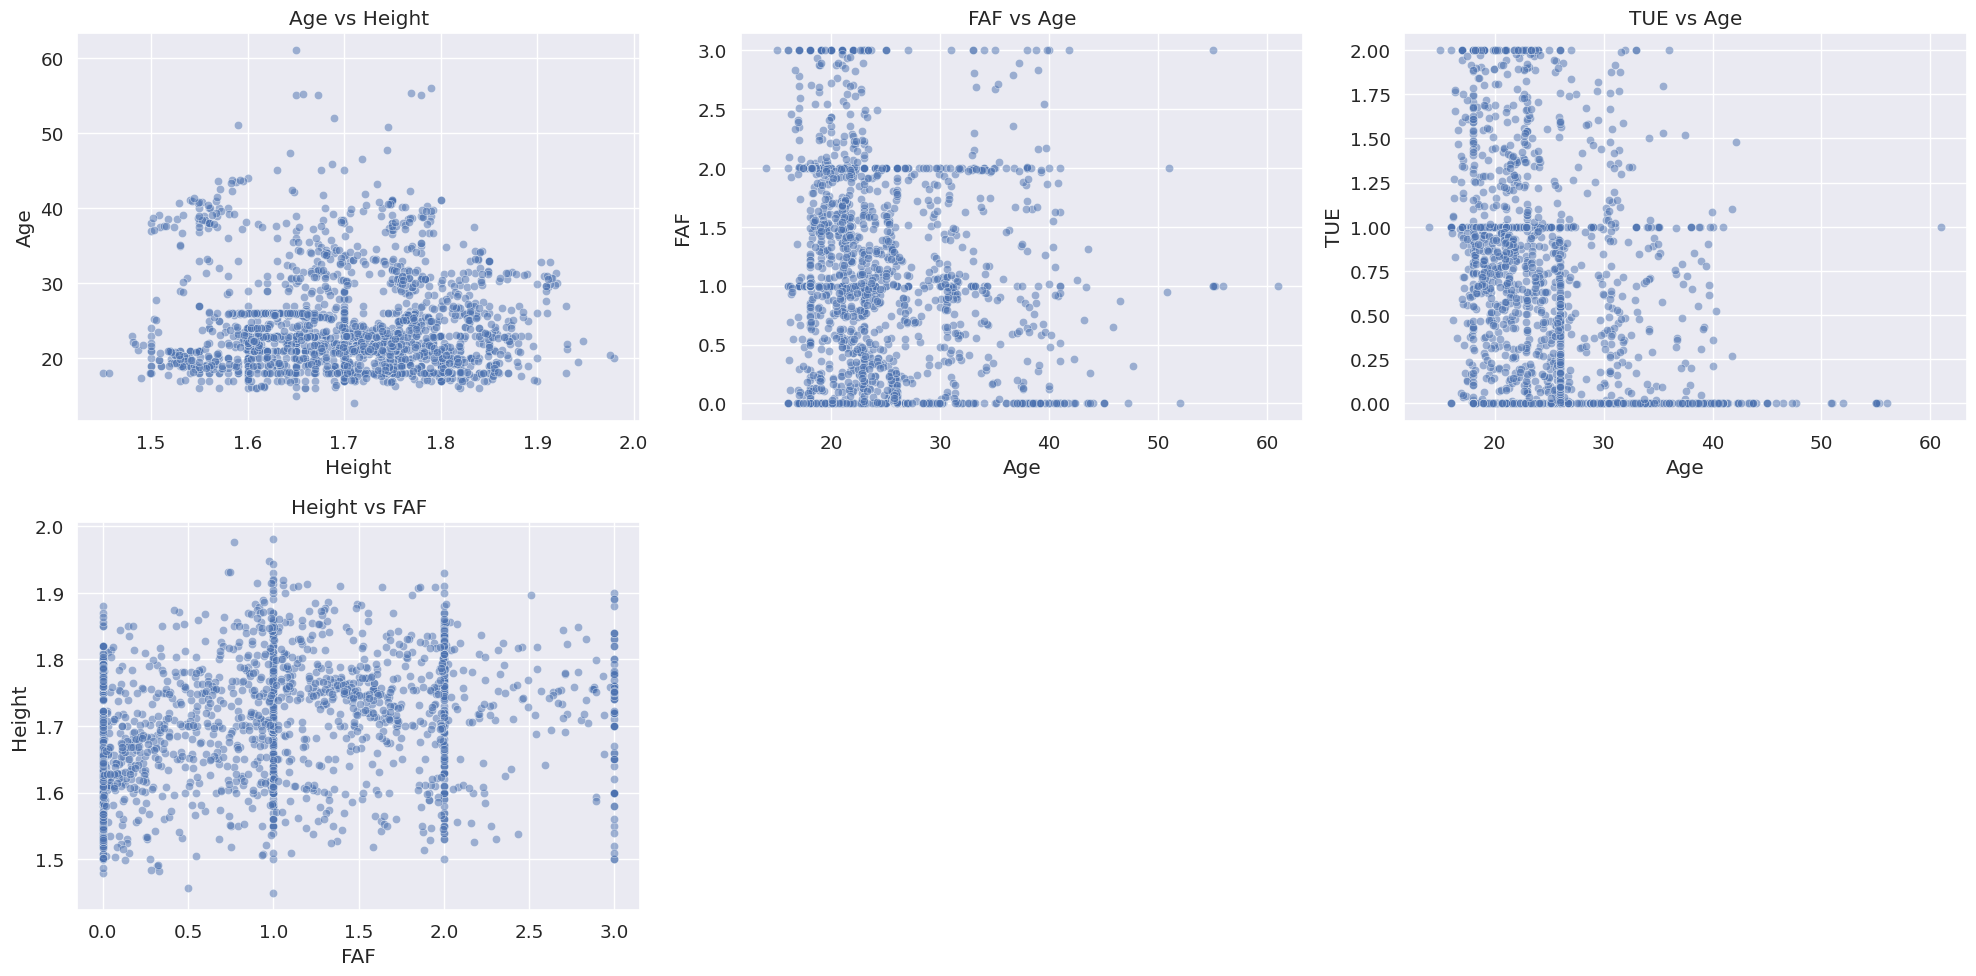

In [30]:
# Tamaño del gráfico general
plt.figure(figsize=(20, 10))

# Pares de variables a graficar
pares_columnas = [
    ('Height', 'Age'),
    ('Age','FAF'),
    ('Age','TUE'),
    ('FAF','Height')
    ]

# Graficar cada par
for i, (columna_x, columna_y) in enumerate(pares_columnas, 1):
    plt.subplot(2, 3, i)
    sbn.scatterplot(data=df_SetObesity_Tratada, x=columna_x, y=columna_y, alpha=0.5)
    plt.title(f'{columna_y} vs {columna_x}')
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)

plt.tight_layout()
plt.show()

### CAMBIO DE VARIABLES STR A NUMEROS

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# CODIFICAR VARIABLES BINARIAS CON "LabelEncoder"
label_encoder = LabelEncoder()
columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for column in columns_to_encode:
    df_SetObesity_Tratada[column] = label_encoder.fit_transform(df_SetObesity_Tratada[column])

# APLICAR "OneHotEncoder" SOLO A VARIABLES MULTICLASE
categorical_multi = ['MTRANS', 'NObeyesdad', 'CALC', 'CAEC']

ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(sparse_output=False), categorical_multi)],
    remainder='passthrough'
)

# Aplicamos transformación
df_SetObesity_Encoded = ct.fit_transform(df_SetObesity_Tratada)

# Nombres de columnas resultantes
encoded_columns = ct.get_feature_names_out()

# Crear DataFrame y limpiar nombres
df_SetObesity_Tratada = pd.DataFrame(df_SetObesity_Encoded, columns=encoded_columns)
df_SetObesity_Tratada.columns = [col.replace("onehot__", "") for col in df_SetObesity_Tratada.columns]
df_SetObesity_Tratada.columns = [col.replace("remainder__", "") for col in df_SetObesity_Tratada.columns]

df_SetObesity_Tratada.head()

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,...,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,64.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,56.0,1.0,0.0,3.0,3.0,1.0,3.0,1.0,3.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,77.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,2.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,87.0,0.0,0.0,3.0,3.0,0.0,2.0,0.0,2.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.8,0.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0


In [32]:
df_SetObesity_Tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MTRANS_Automobile               2111 non-null   float64
 1   MTRANS_Bike                     2111 non-null   float64
 2   MTRANS_Motorbike                2111 non-null   float64
 3   MTRANS_Public_Transportation    2111 non-null   float64
 4   MTRANS_Walking                  2111 non-null   float64
 5   NObeyesdad_Insufficient_Weight  2111 non-null   float64
 6   NObeyesdad_Normal_Weight        2111 non-null   float64
 7   NObeyesdad_Obesity_Type_I       2111 non-null   float64
 8   NObeyesdad_Obesity_Type_II      2111 non-null   float64
 9   NObeyesdad_Obesity_Type_III     2111 non-null   float64
 10  NObeyesdad_Overweight_Level_I   2111 non-null   float64
 11  NObeyesdad_Overweight_Level_II  2111 non-null   float64
 12  CALC_Always                     21

### ALGORITMO APRIORI

In [33]:
# Importamos las librerías necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Función para categorizar en baja, media, alta según percentiles
def categorize(series):
    low = series.quantile(0.33)
    high = series.quantile(0.66)
    return pd.cut(series, bins=[-float('inf'), low, high, float('inf')], labels=['baja', 'media', 'alta'])

# Aplicar categorización a las variables seleccionadas
for col in ['Weight', 'Height', 'Age', 'FAF', 'CH2O']:
    df_SetObesity_Tratada[f'{col}_cat'] = categorize(df_SetObesity_Tratada[col]).astype(str)

# One-hot encoding para las variables categorizadas
df_apriori = pd.get_dummies(df_SetObesity_Tratada[['Weight_cat','Age_cat','FAF_cat','CH2O_cat']])

# Obtener los conjuntos frecuentes con Apriori
frequent_itemsets = apriori(df_apriori, min_support=0.05, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filtrar reglas con al menos un antecedente y consecuente
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
filtered_rules = rules[(rules['antecedent_len'] > 0) & (rules['consequent_len'] > 0)]

# Seleccionar columnas relevantes y ordenar por lift
resultados = filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
resultados = resultados.sort_values(by='lift', ascending=False)

# Mostrar como grilla
resultados.head(15)

,antecedents,consequents,support,confidence,lift
177,"(Weight_cat_alta, FAF_cat_baja)","(Age_cat_alta, CH2O_cat_alta)",0.053529,0.426415,3.502577
176,"(Age_cat_alta, CH2O_cat_alta)","(Weight_cat_alta, FAF_cat_baja)",0.053529,0.439689,3.502577
174,"(Weight_cat_alta, Age_cat_alta)","(FAF_cat_baja, CH2O_cat_alta)",0.053529,0.289003,3.035246
179,"(FAF_cat_baja, CH2O_cat_alta)","(Weight_cat_alta, Age_cat_alta)",0.053529,0.562189,3.035246
181,(Weight_cat_alta),"(Age_cat_alta, FAF_cat_baja, CH2O_cat_alta)",0.053529,0.157382,2.479348
172,"(Age_cat_alta, FAF_cat_baja, CH2O_cat_alta)",(Weight_cat_alta),0.053529,0.843284,2.479348
173,"(Weight_cat_alta, FAF_cat_baja, CH2O_cat_alta)",(Age_cat_alta),0.053529,0.818841,2.407483
180,(Age_cat_alta),"(Weight_cat_alta, FAF_cat_baja, CH2O_cat_alta)",0.053529,0.157382,2.407483
58,"(Weight_cat_alta, FAF_cat_baja)",(Age_cat_alta),0.099005,0.788679,2.318805
59,(Age_cat_alta),"(Weight_cat_alta, FAF_cat_baja)",0.099005,0.291086,2.318805


### REGRESION LINEAL

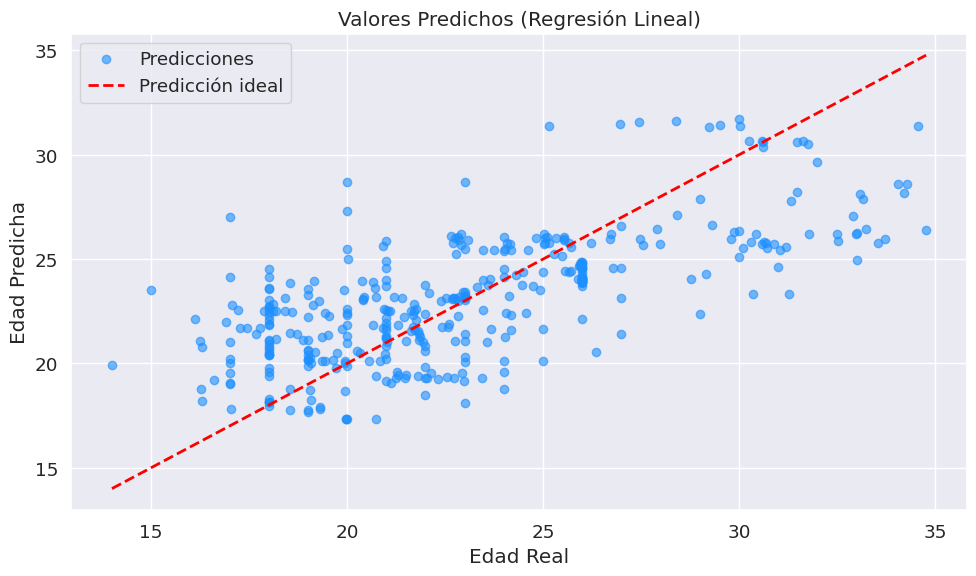


 R2: 0.4839 | RMSE: 3.1482


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Eliminar outliers en la variable 'Age' ---
Q1 = df_SetObesity_Tratada['Age'].quantile(0.25)
Q3 = df_SetObesity_Tratada['Age'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
df = df_SetObesity_Tratada[(df_SetObesity_Tratada['Age'] >= lim_inf) & (df_SetObesity_Tratada['Age'] <= lim_sup)].copy()

# --- Codificar 'Height_cat' como ordinal ---
height_map = {'baja': 0, 'media': 1, 'alta': 2}
df['Height_cat'] = df['Height_cat'].map(height_map)

# --- Crear variable de interacción ---
df['Weight_Height'] = df['Weight'] * df['Height']

# Variables independientes seleccionadas
columnas_modelo = [
    'Weight', 'Weight_Height',
    'family_history_with_overweight',
    'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
    'MTRANS_Public_Transportation', 'MTRANS_Walking',
    'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II',
    'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
    'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no'
]

# Variables
X = df[columnas_modelo]
y = df['Age']

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10, 6))

# Puntos predichos vs reales (azul)
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, label='Predicciones')

# Línea roja ideal (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Predicción ideal')

plt.title("Valores Predichos (Regresión Lineal)")
plt.xlabel("Edad Real")
plt.ylabel("Edad Predicha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\n R2: {r2:.4f} | RMSE: {rmse:.4f}")

### NAIVE BAYES

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear la variable PosibleEnfermedad (1 si family_history_with_overweight > 0, 0 si no)
df_SetObesity_Tratada['PosibleEnfermedad'] = df_SetObesity_Tratada['family_history_with_overweight'].apply(lambda x: 1 if x > 0 else 0)

#
df_SetObesity_Tratada['Height_cat'] = df_SetObesity_Tratada['PosibleEnfermedad']

# Definir X e y
X = df_SetObesity_Tratada[['Gender', 'Age', 'Weight', 'SMOKE', 'CH2O', 'SCC', 'FAF']]
y = df_SetObesity_Tratada['PosibleEnfermedad']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo Naive Bayes (GaussianNB porque variables son continuas)
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predecir en test
y_pred = model_nb.predict(X_test)

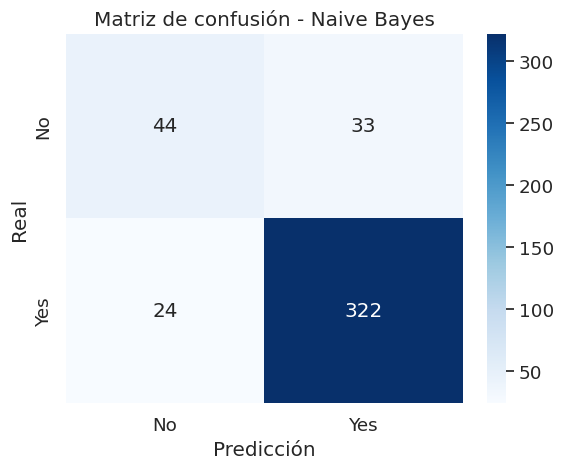


Reporte de clasificación:
              precision    recall  f1-score   support

  No enfermo       0.65      0.57      0.61        77
     Enfermo       0.91      0.93      0.92       346

    accuracy                           0.87       423
   macro avg       0.78      0.75      0.76       423
weighted avg       0.86      0.87      0.86       423



In [37]:
# Variables predictoras y objetivo
X = df_SetObesity_Tratada[['Gender', 'Age', 'Weight', 'SMOKE', 'CH2O', 'SCC', 'FAF']]
y = df_SetObesity_Tratada['PosibleEnfermedad']

# Alinea los índices de y con X
y = y.loc[X.index]

# Dividir en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear modelo Gaussian Naive Bayes y entrenar
model = GaussianNB()
model.fit(X_train, y_train)

# Predicciones y probabilidades
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluación del modelo
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión - Naive Bayes')
plt.show()

# Reporte detallado (precision, recall, F1)
print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred, target_names=['No enfermo', 'Enfermo']))

### ARBOL DE DECISIÓN

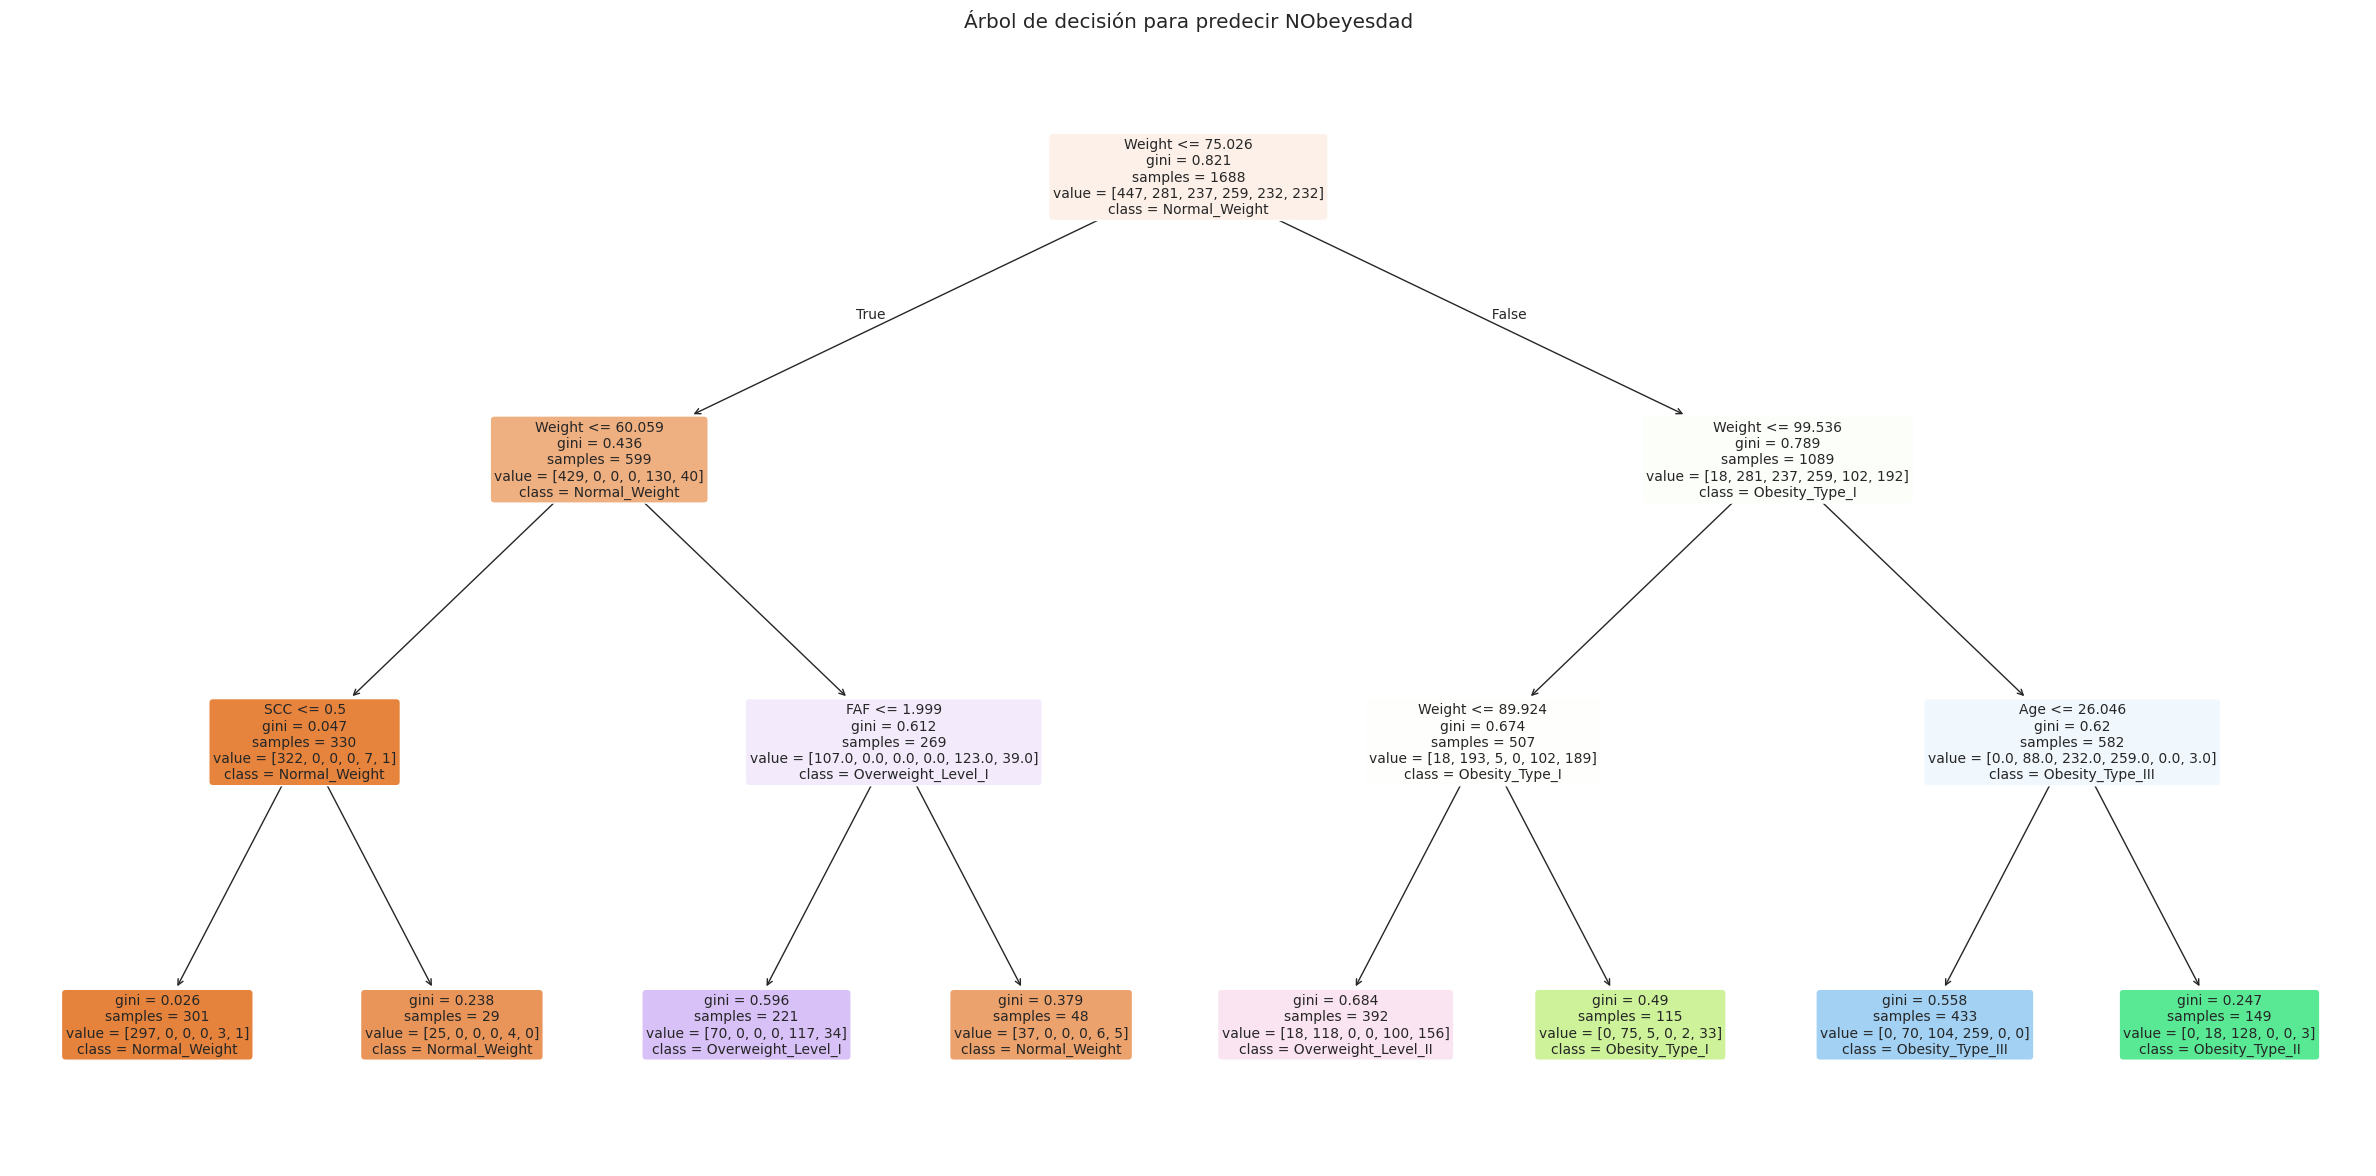

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Reconstruir la variable multiclase 'NObeyesdad' a partir de las columnas one-hot
df_SetObesity_Tratada['NObeyesdad'] = df_SetObesity_Tratada[[
    'NObeyesdad_Normal_Weight'
    ,'NObeyesdad_Obesity_Type_I'
    ,'NObeyesdad_Obesity_Type_II'
    ,'NObeyesdad_Obesity_Type_III'
    ,'NObeyesdad_Overweight_Level_I'
    ,'NObeyesdad_Overweight_Level_II'
]].idxmax(axis=1).str.replace('NObeyesdad_', '')

# Definir features (sin Gender)
features = ['Age', 'Weight', 'SMOKE', 'CH2O', 'SCC', 'FAF']
X = df_SetObesity_Tratada[features]
y = df_SetObesity_Tratada['NObeyesdad']

# Dividir, pero también dividir Gender por separado para análisis posterior
X_train, X_test, y_train, y_test, gender_train, gender_test = train_test_split(
    X, y, df_SetObesity_Tratada['Gender'], test_size=0.2, stratify=y, random_state=42
)

# Crear y entrenar el árbol de decisión
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

# Predicción sobre conjunto de entrenamiento para análisis de género
y_pred_train = clf.predict(X_train)

# DataFrame con clase predicha y género en entrenamiento
df_pred_train = pd.DataFrame({
    'Predicted_Class': y_pred_train,
    'Gender': gender_train.reset_index(drop=True)
})

# Conteo absoluto hombres/mujeres por clase
gender_distribution = df_pred_train.groupby(['Predicted_Class', 'Gender']).size().unstack(fill_value=0)

# Total muestras por clase predicha
total_samples = gender_distribution.sum(axis=1)

# Porcentaje hombres/mujeres por clase
gender_percentage = gender_distribution.div(total_samples, axis=0) * 100

# Renombrar columnas para mejor legibilidad
gender_distribution.columns = ['# Hombres', '# Mujeres']
gender_percentage.columns = ['% Hombres', '% Mujeres']

# Combinar conteos y porcentajes
gender_stats = pd.concat([gender_distribution, gender_percentage], axis=1)

# Visualización del árbol de decisión
plt.figure(figsize=(24, 12))
plot_tree(
    clf, feature_names=features, class_names=clf.classes_,
    filled=True, rounded=True, fontsize=10
)
plt.title('Árbol de decisión para predecir NObeyesdad')
plt.tight_layout()
plt.show()

In [39]:
print("Distribución de género por clase predicha (conjunto de entrenamiento):\n")
print(gender_stats.round(2))

Distribución de género por clase predicha (conjunto de entrenamiento):

                     # Hombres  # Mujeres  % Hombres  % Mujeres
Predicted_Class                                                
Normal_Weight              244        134      64.55      35.45
Obesity_Type_I              13        102      11.30      88.70
Obesity_Type_II              0        149       0.00     100.00
Obesity_Type_III           260        173      60.05      39.95
Overweight_Level_I         132         89      59.73      40.27
Overweight_Level_II        185        207      47.19      52.81


### CLUSTERING

identificar los tipos de personas segun su actividad fisica y sus habitos.

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Variables relevantes para clustering
features = [
    'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
    'MTRANS_Walking', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
    'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'SMOKE',
    'Age', 'Height', 'Weight', 'family_history_with_overweight', 'Gender'
]

# Transformamos variables categóricas a numéricas usando codes
for col in ['Age_cat', 'Height_cat', 'Weight_cat', 'FAF_cat', 'CH2O_cat']:
    df_SetObesity_Tratada[col] = df_SetObesity_Tratada[col].astype('category').cat.codes

# Agregamos estas variables a la lista
features += ['Age_cat', 'Height_cat', 'Weight_cat', 'FAF_cat', 'CH2O_cat']

# Filtramos para quedarnos solo con las columnas existentes (para evitar errores)
features_existentes = [col for col in features if col in df_SetObesity_Tratada.columns]

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_SetObesity_Tratada[features_existentes])

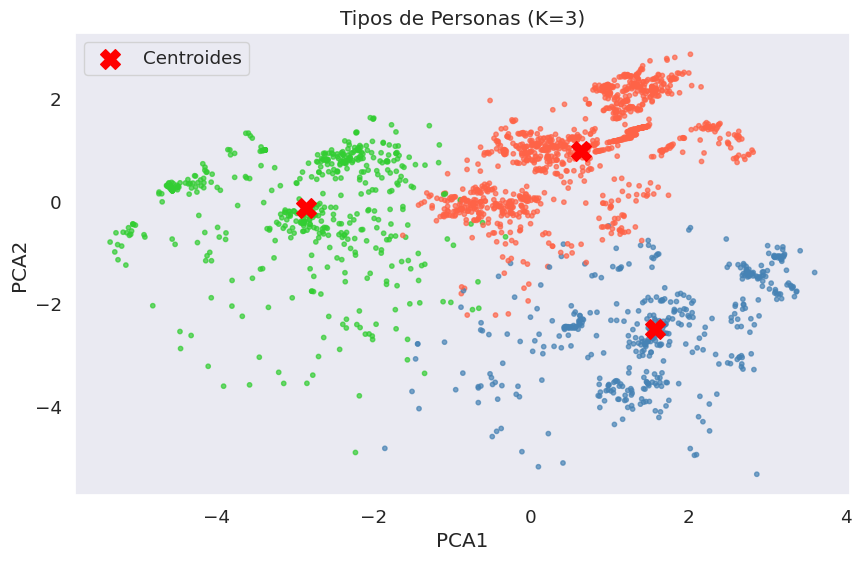


Características de cada tipo de Persona:
   MTRANS_Automobile   MTRANS_Bike  MTRANS_Motorbike  \
0       1.665335e-15 -6.418477e-17          0.000861   
1       9.730942e-01  1.121076e-02          0.002242   
2       4.563492e-02  3.968254e-03          0.017857   

   MTRANS_Public_Transportation  MTRANS_Walking   CALC_Always  \
0                      0.981912        0.017227  1.333569e-17   
1                      0.002242        0.011211 -7.589415e-19   
2                      0.871032        0.061508  1.984127e-03   

   CALC_Frequently  CALC_Sometimes   CALC_no  CAEC_Always  ...    Height  \
0         0.015504        0.711456  0.273040     0.002584  ...  1.713962   
1         0.056054        0.596413  0.347534     0.022422  ...  1.719918   
2         0.053571        0.613095  0.331349     0.079365  ...  1.657237   

      Weight  family_history_with_overweight    Gender   Age_cat  Height_cat  \
0  98.634079                        0.998277  0.508183  1.116279    0.998277   
1  86.9

In [41]:
# Funcion para visualizar los clusters
def plot_clusters(X_plot, y_labels):
    # Colores personalizados por cluster
    colores_personalizados = ['#FF6347', '#4682B4', '#32CD32']

    # Visualización de los clusters con colores personalizados
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=[colores_personalizados[i] for i in y_labels], s=10, alpha=0.7)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.gca().set_axisbelow(True)
    plt.grid()

# Aplicamos K-means con K=3 para identificar 3 tipos de personas
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Visualizacion con PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plot_clusters(X_pca, y_pred)

# Transformar centroides desde el espacio original estandarizado al espacio PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar los centroides con una 'X' roja
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroides')

plt.legend()
plt.title(f'Tipos de Personas (K={k})')
plt.show()

# Asignamos la columna 'TipoPersona' al dataframe original
df_SetObesity_Tratada['TipoPersona'] = y_pred

# Analizamos los centroides para interpretar los clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features_existentes)
centroids_df['Cluster'] = range(k)

# Mostramos las características de cada tipo de persona
print("\nCaracterísticas de cada tipo de Persona:")
print(centroids_df)

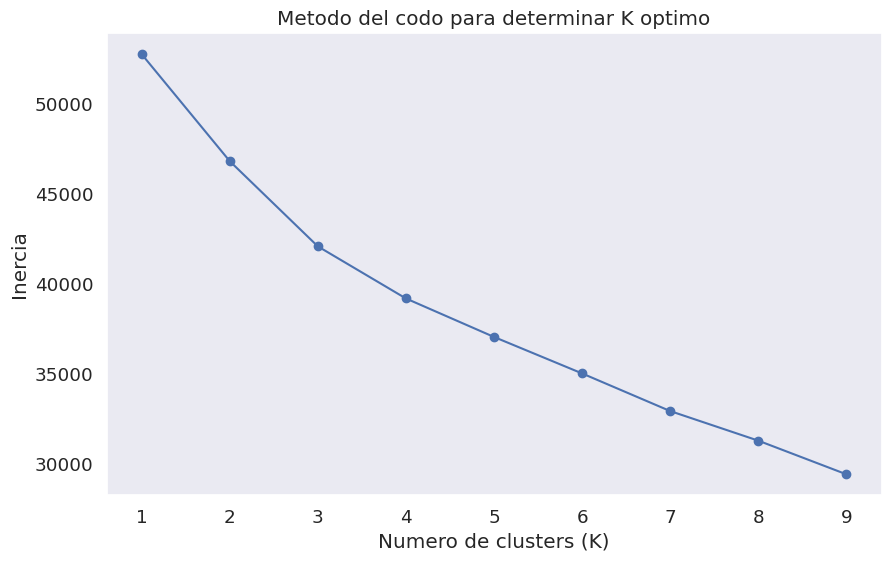

In [42]:
# Metodo del codo para encontrar el numero optimo de clusters
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Graficamos la curva de inercia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Numero de clusters (K)')
plt.ylabel('Inercia')
plt.title('Metodo del codo para determinar K optimo')
plt.grid()
plt.show()

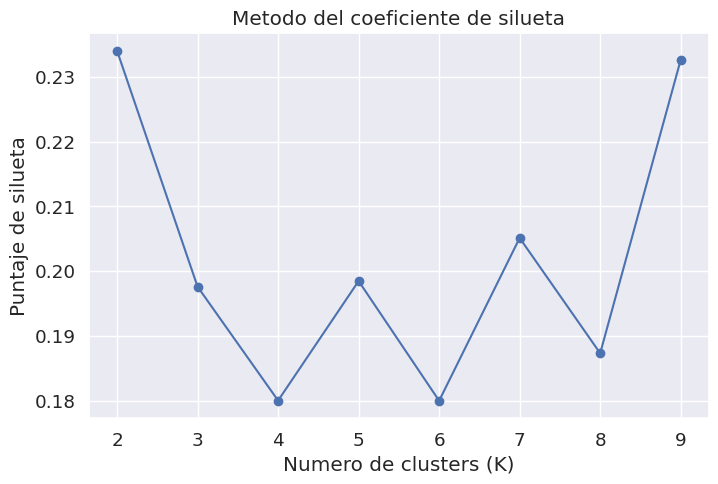

In [43]:
# Metodo de la silueta para encontrar el numero optimo de clusters
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

X_sample = resample(X_scaled, n_samples=2111, random_state=42) # en base a la cantidad de registros, usar una muestra
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Numero de clusters (K)')
plt.ylabel('Puntaje de silueta')
plt.title('Metodo del coeficiente de silueta')
plt.grid(True)
plt.show()